In [1]:
import numpy as np
import os
from keras.layers import Conv3D, MaxPooling3D
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape
#from keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import gc
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.preprocessing import LabelEncoder
import sklearn
import seaborn as sns
import tensorflow as tf
from keras import regularizers
from tensorflow.keras.utils import to_categorical
from prettytable import PrettyTable
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import time
from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.keras.models import load_model

model_paths = [
    #['D:\\FINAL MAJOR20-2\\ALL MODELS 2\\VGG\\VGG_kfold(1)_1.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\VGG\\VGG_kfold(1)_2.h5',
     #'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\VGG\\VGG_kfold(1)_3.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\VGG\\VGG_kfold(1)_4.h5',
     #'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\VGG\\VGG_kfold(1)_5.h5'],

    ['D:\\FINAL MAJOR20-2\\ALL MODELS 2\\ResnetMobile\\resnetMobile_kfold(1)_1.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\ResnetMobile\\resnetMobile_kfold(1)_2.h5',
     'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\ResnetMobile\\resnetMobile_kfold(1)_3.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\ResnetMobile\\resnetMobile_kfold(1)_4.h5',
     'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\ResnetMobile\\resnetMobile_kfold(1)_5.h5'],


    # Add paths for other models similarly
]

models = []
for model_fold_paths in model_paths:
    model_fold = []
    for model_path in model_fold_paths:
        model = load_model(model_path)
        model_fold.append(model)
    models.append(model_fold)
#model2 = load_model('D:\\FINAL MAJOR20-2\\VGG16\\vgg.h5')
#model3 = load_model('D:\\FINAL MAJOR20-2\\CNN_RNN\\cnn_rnn100.h5')
#model4 = load_model('D:\\FINAL MAJOR20-2\\resnet\\resnet.h5')
#model5 = load_model('D:\\FINAL MAJOR20-2\\ResnetMobile\\resnetMobile.h5')
#model6 = load_model('D:\\FINAL MAJOR20-2\\ResnetMobile_VGG\\resnetMobile_vgg_combined.h5')
#model7 = load_model('D:\\FINAL MAJOR20-2\\VGG-lstm\\vgg-lstm.h5')
#model8 = load_model('D:\\FINAL MAJOR20-2\\GLCM-LSTM\\kaggleDataset\\before_Kfold\\GLCM_LSTM.h5')

In [3]:

# Define constants
IMAGE_SIZE = (96, 72)
BATCH_SIZE = 16
EPOCHS = 100
NUM_CLASSES = 18
TRAIN_DATA_DIR = "C:\\Users\\sumit\\Downloads\\Saquib\\output_denoised_image_folder"

# Create a new data generator for the test data
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Generate the test data generator
test_generator = test_datagen.flow_from_directory(
    directory="C:\\Users\\sumit\\Downloads\\Saquib\\output_denoised_image_folder",  # Specify the directory argument
    target_size=IMAGE_SIZE,
    batch_size=1,  # Use batch size 1 for single image prediction
    class_mode='categorical',
    shuffle=False  # Keep the order of predictions
)


# Get the number of samples in the test set
num_test_samples = test_generator.samples

# Get the predictions for the test set
y_pred = model.predict(test_generator, steps=num_test_samples)

# Get the ground truth labels for the test set
y_true = test_generator.classes

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Convert class labels to numeric labels
numeric_labels = [test_generator.class_indices[label] for label in class_labels]

# Map numeric labels to class labels
numeric_to_label = dict(zip(numeric_labels, class_labels))

# Map numeric predictions to class labels
y_pred_labels = [numeric_to_label[label] for label in y_pred_classes]

# Convert ground truth labels to class labels
y_true_labels = [numeric_to_label[label] for label in y_true]

# Display the class labels and their numeric mappings
print("Class Labels:")
print(class_labels)
print("Numeric Labels:")
print(numeric_labels)

# Display the true and predicted labels for the test set
print("True Labels:")
print(y_true_labels)
print("Predicted Labels:")
print(y_pred_labels)

# Calculate the accuracy on the test set
test_acc = np.sum(y_pred_classes == y_true) / num_test_samples
print(f'Test Accuracy: {test_acc * 100}')


Found 298 images belonging to 17 classes.
Class Labels:
['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'box', 'fun', 'good', 'grow', 'hero', 'trust']
Numeric Labels:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
True Labels:
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '8', '8

In [9]:
# Assuming X_test and y_test are your test data and labels
y_pred_model1 = model.predict(test_generator)
#y_pred_model2 = model2.predict(test_generator)


In [4]:

# Define constants
IMAGE_SIZE = (96, 72)
BATCH_SIZE = 16
EPOCHS = 100
NUM_CLASSES = 17
TRAIN_DATA_DIR = "C:\\Users\\sumit\\Downloads\\Saquib\\output_denoised_image_folder"

# Create a new data generator for the test data
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Generate the test data generator
test_generator = test_datagen.flow_from_directory(
    directory="C:\\Users\\sumit\\Downloads\\Saquib\\output_denoised_image_folder",  # Specify the directory argument
    target_size=IMAGE_SIZE,
    batch_size=1,  # Use batch size 1 for single image prediction
    class_mode='categorical',
    shuffle=False  # Keep the order of predictions
)


Found 298 images belonging to 17 classes.


In [ ]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Path to the directory containing the model files
model_dir = 'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\CNN'

# List to store AUC scores
auc_scores = []


for i in range(1, 5):  # Assuming 7 K-fold models
    model_path = os.path.join(model_dir, f'cnn_kfold({i})_1.h5')  # Update with the correct filename pattern for your CNN models
    model = tf.keras.models.load_model(model_path)

    # Perform predictions and calculate AUC
    # Assuming you have the necessary data and labels for predictions
    y_pred = model.predict(test_generator, steps=num_test_samples)
    fpr, tpr, _ = roc_curve(class_labels, y_pred)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

        # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'Fold {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

# Print average AUC score
print(f'Average AUC: {sum(auc_scores) / len(auc_scores):.2f}')

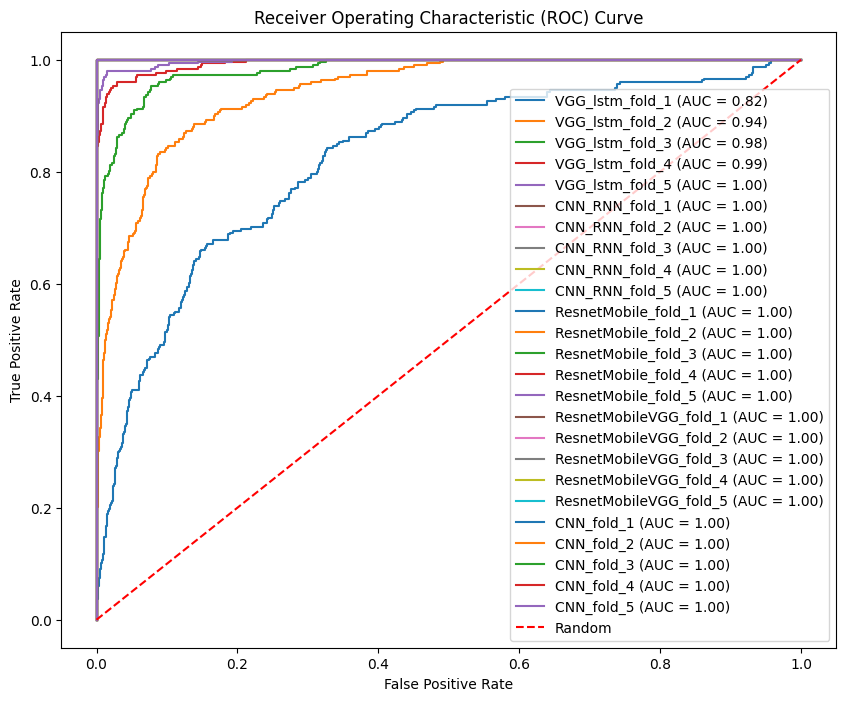

In [5]:
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import KFold
import time

# Define constants
NUM_CLASSES = 17

# Load the models using K-fold cross-validation
model_paths = [
    #['D:\\FINAL MAJOR20-2\\ALL MODELS 2\\VGG\\VGG_kfold(1)_1.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\VGG\\VGG_kfold(1)_2.h5',
     #'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\VGG\\VGG_kfold(1)_3.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\VGG\\VGG_kfold(1)_4.h5',
     #'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\VGG\\VGG_kfold(1)_5.h5'],

    ['D:\\FINAL MAJOR20-2\\ALL MODELS 2\\VGG_lstm\\VGG-lstm_kfold(1)_1.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\VGG_lstm\\VGG-lstm_kfold(1)_2.h5',
     'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\VGG_lstm\\VGG-lstm_kfold(1)_3.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\VGG_lstm\\VGG-lstm_kfold(1)_4.h5',
     'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\VGG_lstm\\VGG-lstm_kfold(1)_5.h5'],

    ['D:\\FINAL MAJOR20-2\\ALL MODELS 2\\CNN_RNN\\cnn-rnn_kfold(1)_1.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\CNN_RNN\\cnn-rnn_kfold(1)_2.h5',
     'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\CNN_RNN\\cnn-rnn_kfold(1)_3.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\CNN_RNN\\cnn-rnn_kfold(1)_4.h5',
     'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\CNN_RNN\\cnn-rnn_kfold(1)_4.h5'],

    ['D:\\FINAL MAJOR20-2\\ALL MODELS 2\\ResnetMobile\\resnetMobile_kfold(1)_1.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\ResnetMobile\\resnetMobile_kfold(1)_2.h5',
     'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\ResnetMobile\\resnetMobile_kfold(1)_3.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\ResnetMobile\\resnetMobile_kfold(1)_4.h5',
     'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\ResnetMobile\\resnetMobile_kfold(1)_5.h5'],

    ['D:\\FINAL MAJOR20-2\\ALL MODELS 2\\ResnetMobileVGG\\resnetMobile-vgg_kfold(1)_1.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\ResnetMobileVGG\\resnetMobile-vgg_kfold(1)_2.h5',
     'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\ResnetMobileVGG\\resnetMobile-vgg_kfold(1)_3.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\ResnetMobileVGG\\resnetMobile-vgg_kfold(1)_4.h5',
     'D:\\FINAL MAJOR20-2\\ALL MODELS 2\\ResnetMobileVGG\\resnetMobile-vgg_kfold(1)_5.h5'],

    ['D:\\FINAL MAJOR20-2\\CrossValidation\\CNN\\own\\cnn_kfold(1)_1.h5', 'D:\\FINAL MAJOR20-2\\CrossValidation\\CNN\\own\\cnn_kfold(1)_2.h5',
     'D:\\FINAL MAJOR20-2\\CrossValidation\\CNN\\own\\cnn_kfold(1)_3.h5', 'D:\\FINAL MAJOR20-2\\CrossValidation\\CNN\\own\\cnn_kfold(1)_4.h5',
     'D:\\FINAL MAJOR20-2\\CrossValidation\\CNN\\own\\cnn_kfold(1)_5.h5'],
    
    #['D:\\FINAL MAJOR20-2\\CrossValidation\\Resnet\\own\\resnet_kfold(1)_1.h5','D:\\FINAL MAJOR20-2\\CrossValidation\\Resnet\\own\\resnet_kfold(1)_2.h5',
     #'D:\\FINAL MAJOR20-2\\CrossValidation\\Resnet\\own\\resnet_kfold(1)_3.h5','D:\\FINAL MAJOR20-2\\CrossValidation\\Resnet\\own\\resnet_kfold(1)_4.h5',
     #'D:\\FINAL MAJOR20-2\\CrossValidation\\Resnet\\own\\resnet_kfold(1)_5.h5'],
]

models = []
for model_fold_paths in model_paths:
    model_fold = []
    for model_path in model_fold_paths:
        model = load_model(model_path)
        model_fold.append(model)
    models.append(model_fold)

# Get the predictions for the test set
y_preds = []
for model_fold in models:
    model_fold_preds = []
    for model in model_fold:
        model_preds = model.predict(test_generator, steps=num_test_samples)
        model_fold_preds.append(model_preds)
    y_preds.append(model_fold_preds)

# Assuming y_true and y_preds are available
y_true_binarized = label_binarize(y_true, classes=np.unique(y_true))

# Calculate ROC curve and AUC for each model
fprs, tprs, aucs = [], [], []
for model_fold_preds in y_preds:
    model_fpr, model_tpr, model_auc = [], [], []
    for model_preds in model_fold_preds:
        fpr, tpr, _ = roc_curve(y_true_binarized.ravel(), model_preds.ravel())
        auc_score = roc_auc_score(y_true_binarized, model_preds, average='micro')
        model_fpr.append(fpr)
        model_tpr.append(tpr)
        model_auc.append(auc_score)
    fprs.append(model_fpr)
    tprs.append(model_tpr)
    aucs.append(model_auc)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
for i, model_name in enumerate(['VGG_lstm', 'CNN_RNN', 'ResnetMobile', 'ResnetMobileVGG', 'CNN']):  # Add other model names here
    for j, model_fold_name in enumerate([f'fold_{k+1}' for k in range(5)]):
        plt.plot(fprs[i][j], tprs[i][j], label=f'{model_name}_{model_fold_name} (AUC = {aucs[i][j]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# KAGGLE DATASET

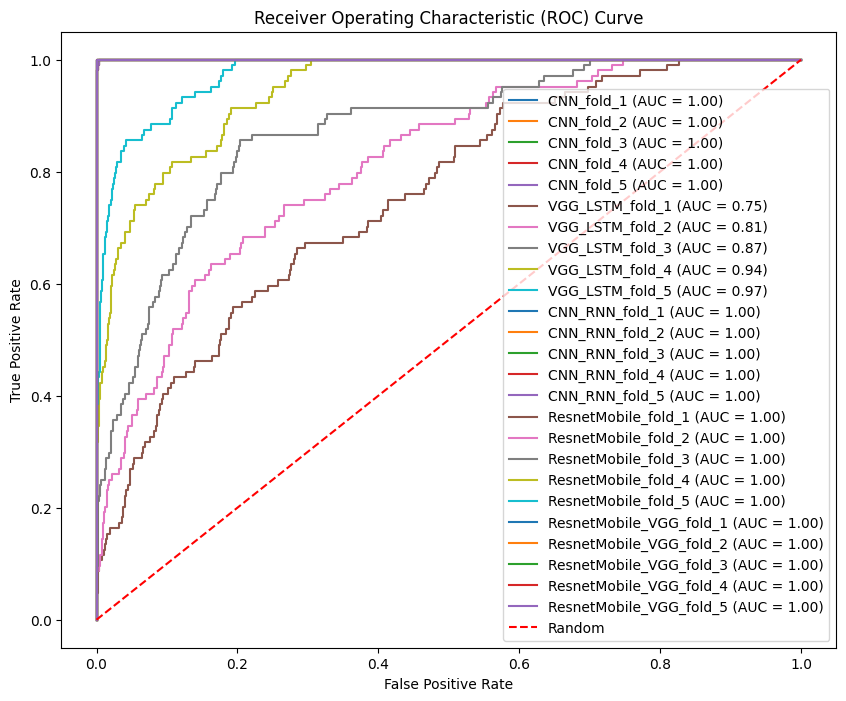

In [15]:
# Plot the ROC curves
plt.figure(figsize=(10, 8))
for i, model_name in enumerate(['CNN', 'VGG_LSTM', 'CNN_RNN', 'ResnetMobile', 'ResnetMobile_VGG']):  # Add other model names here
    for j, model_fold_name in enumerate([f'fold_{k+1}' for k in range(5)]):
        plt.plot(fprs[i][j], tprs[i][j], label=f'{model_name}_{model_fold_name} (AUC = {aucs[i][j]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# OWN DATASET

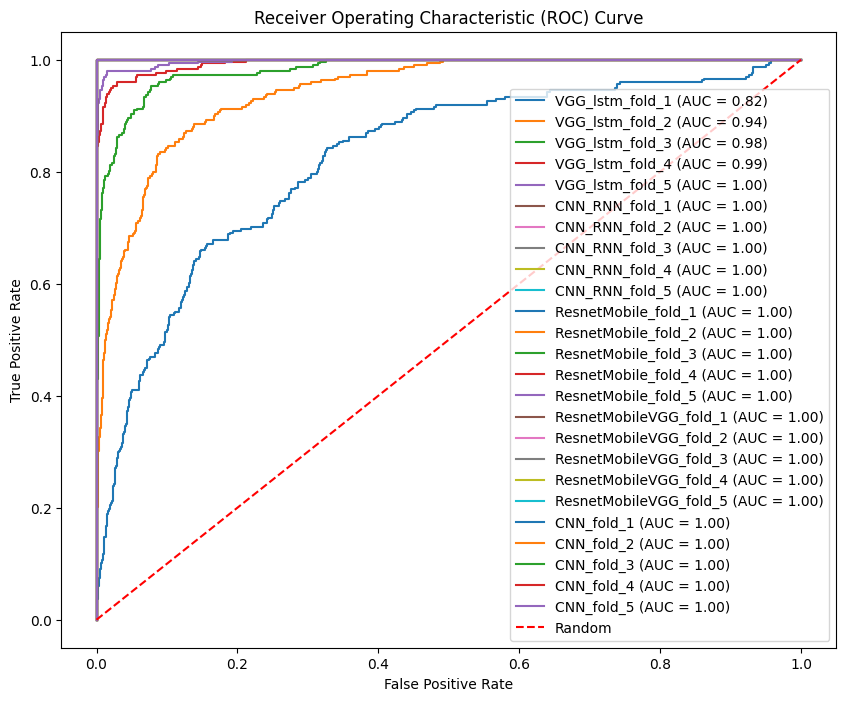

In [6]:
# Plot the ROC curves
plt.figure(figsize=(10, 8))
for i, model_name in enumerate(['VGG_lstm', 'CNN_RNN', 'ResnetMobile', 'ResnetMobileVGG', 'CNN']):  # Add other model names here
    for j, model_fold_name in enumerate([f'fold_{k+1}' for k in range(5)]):
        plt.plot(fprs[i][j], tprs[i][j], label=f'{model_name}_{model_fold_name} (AUC = {aucs[i][j]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()